In [1]:
import yfinance as yf
import pandas as pd

stock_name = 'TSLA'
df = yf.download(stock_name,multi_level_index=False)
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...
2025-05-19,342.089996,343.000000,333.369995,336.299988,88869900
2025-05-20,343.820007,354.989990,341.630005,347.869995,131715500
2025-05-21,334.619995,347.350006,332.200012,344.429993,102354800


In [ ]:
#TALIB
!pip install ta-lib

In [ ]:
!pip install pandas-ta

In [2]:
import pandas_ta as ta

ta.sma(df['Close'])

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
                 ...    
2025-05-19    316.967004
2025-05-20    323.814005
2025-05-21    329.654004
2025-05-22    335.276004
2025-05-23    339.384003
Name: SMA_10, Length: 3750, dtype: float64

In [ ]:
!pip install numpy==1.26.4

In [5]:
sma1=ta.sma(df['Close'],length=20)
df['sma']=sma1
df

,Close,High,Low,Open,Volume,sma
Date,,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500,NaN
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500,NaN
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000,NaN
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000,NaN
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500,NaN
...,...,...,...,...,...,...
2025-05-19,342.089996,343.000000,333.369995,336.299988,88869900,295.545004
2025-05-20,343.820007,354.989990,341.630005,347.869995,131715500,300.837504
2025-05-21,334.619995,347.350006,332.200012,344.429993,102354800,305.031503


In [7]:
import numpy as np
import pandas as pd

def sma(close, length=10, talib=None, offset=0, **kwargs):
    """Simple Moving Average (SMA)"""
    # Validate inputs
    if not isinstance(close, (pd.Series, np.ndarray, list)):
        raise ValueError("Input 'close' must be a pandas Series, numpy array, or list.")

    close = pd.Series(close)
    length = int(length) if length and length > 0 else 10
    min_periods = int(kwargs.get("min_periods", length))
    offset = int(offset) if offset else 0

    # Calculate SMA
    sma = close.rolling(window=length, min_periods=min_periods).mean()

    # Apply offset
    if offset != 0:
        sma = sma.shift(offset)

    # Handle fillna and fill_method
    if "fillna" in kwargs:
        sma = sma.fillna(kwargs["fillna"])
    if "fill_method" in kwargs:
        sma = sma.fillna(method=kwargs["fill_method"])

    # Add metadata (optional)
    sma.name = f"SMA_{length}"
    sma.category = "overlap"

    return sma


df['sma2']=sma(df['Close'])
df

,Close,High,Low,Open,Volume,sma,sma2
Date,,,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500,NaN,NaN
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500,NaN,NaN
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000,NaN,NaN
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000,NaN,NaN
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500,NaN,NaN
...,...,...,...,...,...,...,...
2025-05-19,342.089996,343.000000,333.369995,336.299988,88869900,295.545004,316.967004
2025-05-20,343.820007,354.989990,341.630005,347.869995,131715500,300.837504,323.814005
2025-05-21,334.619995,347.350006,332.200012,344.429993,102354800,305.031503,329.654004


In [9]:
import numpy as np
import pandas as pd

def ema(close, length=10, talib=None, offset=0, **kwargs):
    """Exponential Moving Average (EMA)"""
    # Validate inputs
    if not isinstance(close, (pd.Series, np.ndarray, list)):
        raise ValueError("Input 'close' must be a pandas Series, numpy array, or list.")

    close = pd.Series(close).astype(float)
    length = int(length) if length and length > 0 else 10
    offset = int(offset) if offset else 0
    adjust = kwargs.pop("adjust", False)
    use_sma_init = kwargs.pop("sma", True)

    # Initialize with SMA if specified
    if use_sma_init:
        close = close.copy()
        if len(close) >= length:
            sma_nth = close.iloc[:length].mean()
            close.iloc[:length - 1] = np.nan
            close.iloc[length - 1] = sma_nth
        else:
            close[:] = np.nan

    # Calculate EMA
    ema = close.ewm(span=length, adjust=adjust).mean()

    # Apply offset
    if offset != 0:
        ema = ema.shift(offset)

    # Handle fillna and fill_method
    if "fillna" in kwargs:
        ema = ema.fillna(kwargs["fillna"])
    if "fill_method" in kwargs:
        ema = ema.fillna(method=kwargs["fill_method"])

    # Add metadata
    ema.name = f"EMA_{length}"
    ema.category = "overlap"

    return ema



df['ema1']=ta.ema(df['Close'])
df['ema2']=ema(df['Close'])
df

,Close,High,Low,Open,Volume,sma,sma2,ema1,ema2
Date,,,,,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500,NaN,NaN,NaN,NaN
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500,NaN,NaN,NaN,NaN
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000,NaN,NaN,NaN,NaN
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000,NaN,NaN,NaN,NaN
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-05-19,342.089996,343.000000,333.369995,336.299988,88869900,295.545004,316.967004,323.334301,323.334301
2025-05-20,343.820007,354.989990,341.630005,347.869995,131715500,300.837504,323.814005,327.058975,327.058975
2025-05-21,334.619995,347.350006,332.200012,344.429993,102354800,305.031503,329.654004,328.433706,328.433706


In [10]:
!pip install mplfinance

  Using cached mplfinance-0.12.10b0-py3-none-any.whl.metadata (19 kB)
  Using cached contourpy-1.3.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached mplfinance-0.12.10b0-py3-none-any.whl (75 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 7.1 MB/s eta 0:00:00a 0:00:01m
Using cached contourpy-1.3.2-cp312-cp312-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 5.6 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.2.1-cp312-cp312-macosx_11_0_arm64.whl (3.0 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)


/Users/algo trading 2025/batch 31/.venv/lib/python3.12/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


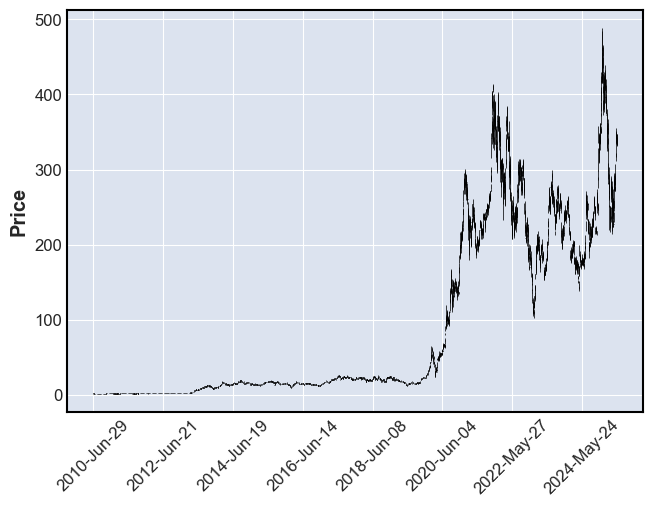

In [11]:
import mplfinance as mpf
mpf.plot(df)